 Using a built-in dataset - in Python -  of
your choice, fit a linear regression model to
examine the relationship between a numerical
dependent variable and one or more
independent variables.

# Toy Example


In [ ]:
import pandas as pd

data = pd.read_excel("/content/mammals.xlsx")

data.head()

,Unnamed: 0,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Rename the first column
data.rename(columns={data.columns[0]: 'animal'}, inplace=True)

X = data[['body']]  # independent variable
y = data['brain']   # dependent variable

# Add constant term for intercept
X = sm.add_constant(X)  # adds a column of 1s to X for the intercept

#OLS (Ordinary Least Squares)
# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the full statistical summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.54e-28
Time:                        07:26:25   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.0

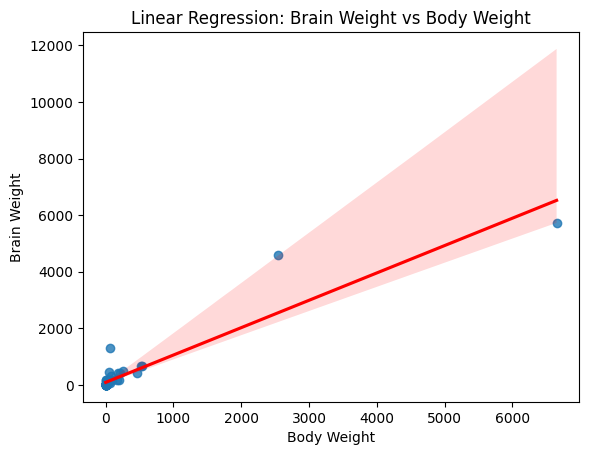

In [ ]:
# Scatter plot with regression line
sns.regplot(x='body', y='brain', data=data, line_kws={"color": "red"})
plt.title('Linear Regression: Brain Weight vs Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()


Correlation Matrix:
           body     brain
body   1.000000  0.934164
brain  0.934164  1.000000


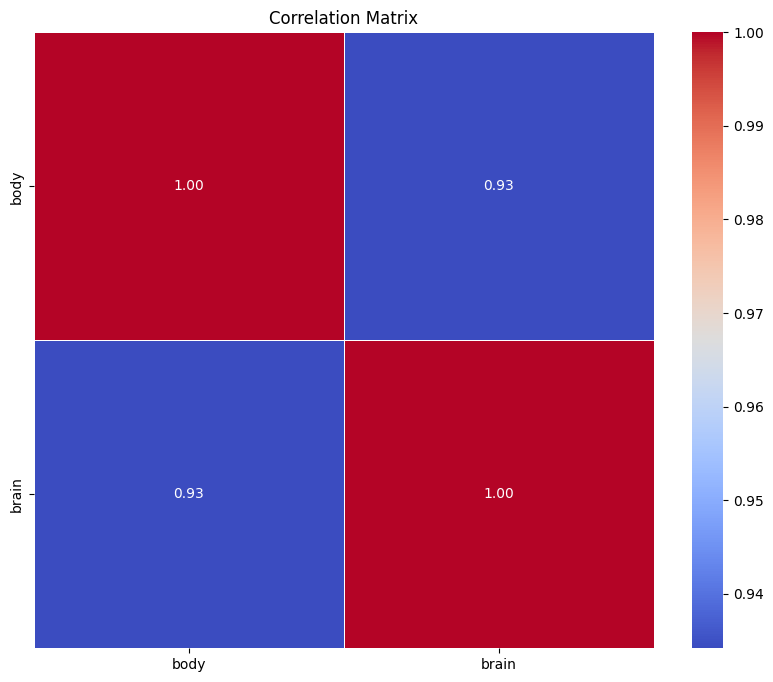

In [ ]:
# Ensure that we only use numeric columns for correlation
data_numeric = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
